In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


--2020-07-10 04:39:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   308MB/s    in 0.2s    

2020-07-10 04:39:07 (308 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile
local_zip="/tmp/cats_and_dogs_filtered.zip"
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
os.listdir("/tmp/cats_and_dogs_filtered")

['train', 'vectorize.py', 'validation']

In [6]:
os.listdir("/tmp/cats_and_dogs_filtered/train")

['dogs', 'cats']

In [8]:
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/dogs")))
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/cats")))

1000
1000


In [11]:
base_dir="/tmp/cats_and_dogs_filtered"
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
#training with cat images
train_cat=os.path.join(train_dir,'cats')
train_dog=os.path.join(train_dir,'dogs')
validation_cat=os.path.join(validation_dir,'cats')
validation_dog=os.path.join(validation_dir,'dogs')

In [14]:
# File name
file_name_dir=os.listdir(train_cat)
file_name_dir[:4]

['cat.955.jpg', 'cat.776.jpg', 'cat.914.jpg', 'cat.467.jpg']

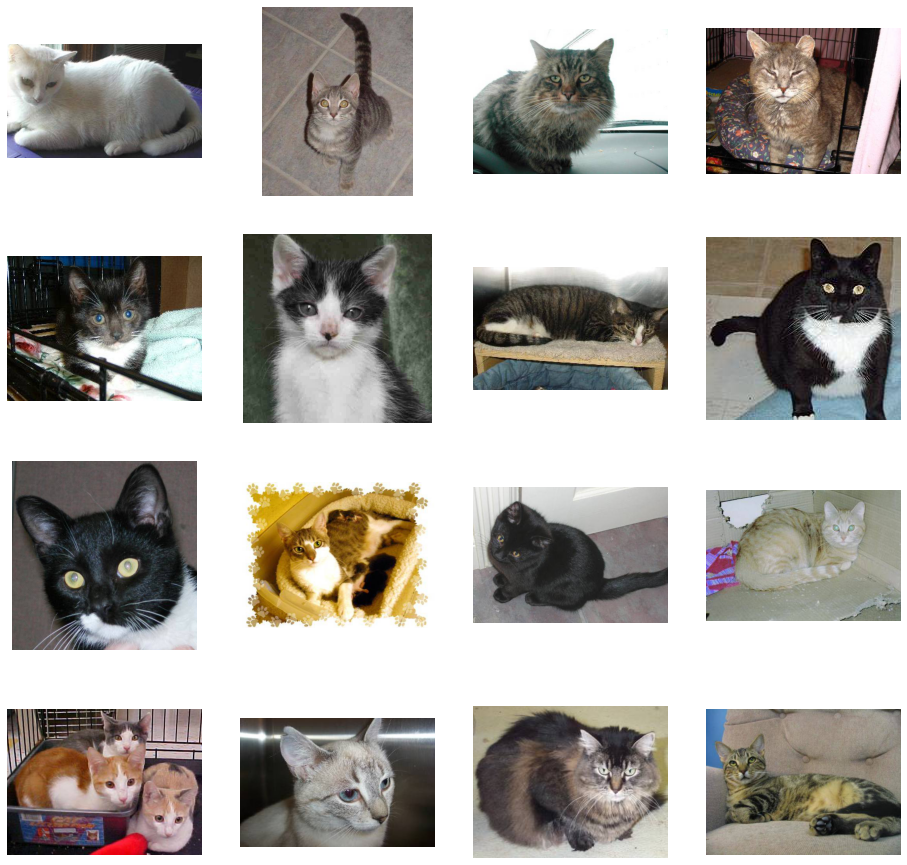

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j=1
for i in range(16):
  img=plt.imread(os.path.join(train_cat,file_name_dir[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.axis('off')

  j+=1

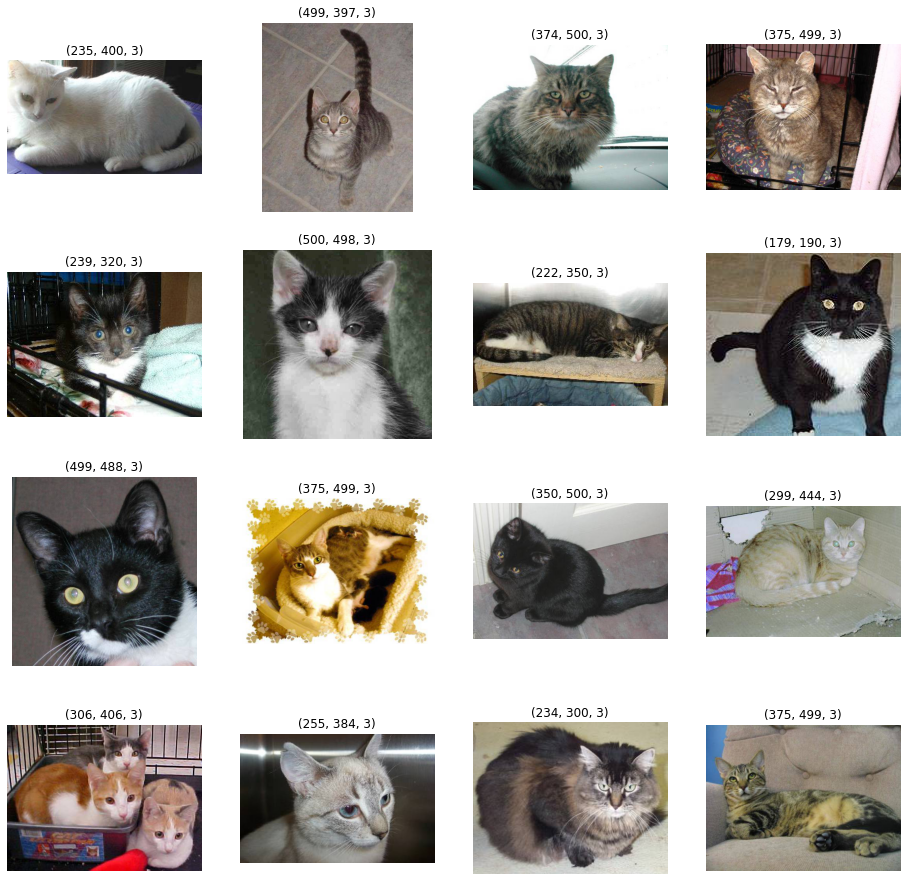

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j=1
for i in range(16):
  img=plt.imread(os.path.join(train_cat,file_name_dir[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')

  j+=1

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
train_generator

(20, 150, 150, 3)
(20,)


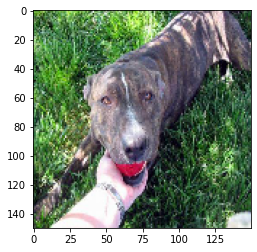

In [20]:
imgs,labels=train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])